In [1]:
import os

import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
pd.set_option('max_columns', None)

In [4]:
DATA_PATH = '../../Data/TRANSFORMED_DATA/lr_transformed_cea_data.csv'

In [5]:
df = pd.read_csv(DATA_PATH)

In [6]:
df.shape

(2219164, 12)

In [7]:
df.head()

id_pat        date    activity  timeline  Acc_x  Acc_y  Acc_z    Gyro_x  \
0    P01  2019-05-07  2minBassin  0.000000   2.50  -9.38   0.25 -0.025089   
1    P01  2019-05-07  2minBassin  0.025575   2.43  -9.51   0.34 -0.013090   
2    P01  2019-05-07  2minBassin  0.051151   2.15  -9.62   0.51 -0.001091   
3    P01  2019-05-07  2minBassin  0.076726   2.20  -9.63   0.62 -0.014181   
4    P01  2019-05-07  2minBassin  0.102302   2.20  -9.51   0.93 -0.085085   

     Gyro_y    Gyro_z  appui_leve  foot_type  
0 -0.001091  0.021817         0.0          0  
1 -0.021817  0.005454         0.0          0  
2 -0.018544  0.007636         0.0          0  
3  0.011999 -0.003272         0.0          0  
4  0.078540 -0.041452         0.0          0

In [8]:
df.timeline.diff().describe()

count    2.219163e+06
mean     1.222293e-05
std      3.717320e+00
min     -2.203325e+03
25%      2.538071e-02
50%      2.538071e-02
75%      2.544529e-02
max      2.577320e-02
Name: timeline, dtype: float64

In [76]:
#test_df = df[(df.id_pat=='P01') & (df.activity=='GetUpAndGo') & (df.foot_type==0)]

In [9]:
df['groups'] = (df.appui_leve != df.appui_leve.shift(1)).cumsum()

In [10]:
df

id_pat        date    activity   timeline  Acc_x   Acc_y  Acc_z  \
0          P01  2019-05-07  2minBassin   0.000000   2.50   -9.38   0.25   
1          P01  2019-05-07  2minBassin   0.025575   2.43   -9.51   0.34   
2          P01  2019-05-07  2minBassin   0.051151   2.15   -9.62   0.51   
3          P01  2019-05-07  2minBassin   0.076726   2.20   -9.63   0.62   
4          P01  2019-05-07  2minBassin   0.102302   2.20   -9.51   0.93   
...        ...         ...         ...        ...    ...     ...    ...   
2219159    P42  2020-07-13        Step  27.022901   1.14   -9.64   1.67   
2219160    P42  2020-07-13        Step  27.048346   1.09   -9.58   1.72   
2219161    P42  2020-07-13        Step  27.073791   1.31   -9.28   1.66   
2219162    P42  2020-07-13        Step  27.099237   0.99   -9.48   1.78   
2219163    P42  2020-07-13        Step  27.124682   0.00 -294.39  43.53   

            Gyro_x     Gyro_y     Gyro_z  appui_leve  foot_type  groups  
0        -0.025089  -0.001091   0.021817         0.0          0       1  
1        -0.013090  -0.021817   0.005454         0.0          0       1  
2        -0.001091  -0.018544   0.007636         0.0          0       1  
3        -0.014181   0.011999  -0.003272         0.0          0       1  
4        -0.085085   0.078540  -0.041452         0.0          0       1  
...            ...        ...        ...         ...        ...     ...  
2219159   0.112356  -0.186532   0.010908         0.0          1   35205  
2219160   0.267254  -0.296706   0.047997         0.0          1   35205  
2219161   0.234529  -0.265072   0.066541         0.0          1   35205  
2219162   0.266163  -0.250891   0.105811         0.0          1   35205  
2219163  11.779882  16.800976 -27.041695         0.0          1   35205  

[2219164 rows x 13 columns]

In [11]:
length_actions = [frame.timeline.max()-frame.timeline.min() for _,frame in df.groupby('groups')]

In [12]:
pd.Series(length_actions).describe()

count    35205.000000
mean         2.605880
std         29.934492
min          0.000000
25%          0.304569
50%          0.710660
75%          0.888325
max       2203.324873
dtype: float64

In [13]:
train_df = df[df.id_pat!='P42']
test_df = df[df.id_pat=='P42']

In [68]:
train_df.shape, test_df.shape

((2163496, 13), (55668, 13))

## Variate size windows

In [87]:
train_var_frames = [frame for _,frame in train_df.groupby('groups')]
test_var_frames = [frame for _,frame in test_df.groupby('groups')]

In [334]:
df[(df.id_pat=='P01')&(df.activity=='GetUpAndGo')&(df.foot_type==0)]

id_pat        date    activity   timeline  Acc_x  Acc_y  Acc_z  \
24229    P01  2019-05-07  GetUpAndGo   0.000000   2.15  -9.34   1.39   
24230    P01  2019-05-07  GetUpAndGo   0.025575   1.98  -9.34   1.39   
24231    P01  2019-05-07  GetUpAndGo   0.051151   1.93  -9.48   1.44   
24232    P01  2019-05-07  GetUpAndGo   0.076726   1.74  -9.67   1.56   
24233    P01  2019-05-07  GetUpAndGo   0.102302   1.77  -9.52   1.46   
...      ...         ...         ...        ...    ...    ...    ...   
27506    P01  2019-05-07  GetUpAndGo  83.810742   2.72  -9.47  -0.05   
27507    P01  2019-05-07  GetUpAndGo  83.836317   2.72  -9.47  -0.05   
27508    P01  2019-05-07  GetUpAndGo  83.861893   2.68  -9.53  -0.05   
27509    P01  2019-05-07  GetUpAndGo  83.887468   2.66  -9.54   0.00   
27510    P01  2019-05-07  GetUpAndGo  83.913043   2.68  -9.52  -0.01   

         Gyro_x    Gyro_y    Gyro_z  appui_leve  foot_type  groups  
24229 -0.018544 -0.056723  0.075267         0.0          0     343  
24230 -0.005454 -0.040361  0.019635         0.0          0     343  
24231 -0.046906 -0.062177  0.003272         0.0          0     343  
24232  0.027271 -0.279253  0.016362         0.0          0     343  
24233  0.090539 -0.505055  0.025089         0.0          0     343  
...         ...       ...       ...         ...        ...     ...  
27506  0.015272 -0.055632 -0.007636         0.0          0     375  
27507  0.006545 -0.027271 -0.001091         0.0          0     375  
27508  0.000000 -0.008727 -0.001091         0.0          0     375  
27509 -0.009817  0.015272  0.003272         0.0          0     375  
27510 -0.008727  0.010908  0.003272         0.0          0     375  

[3282 rows x 13 columns]

<AxesSubplot:>

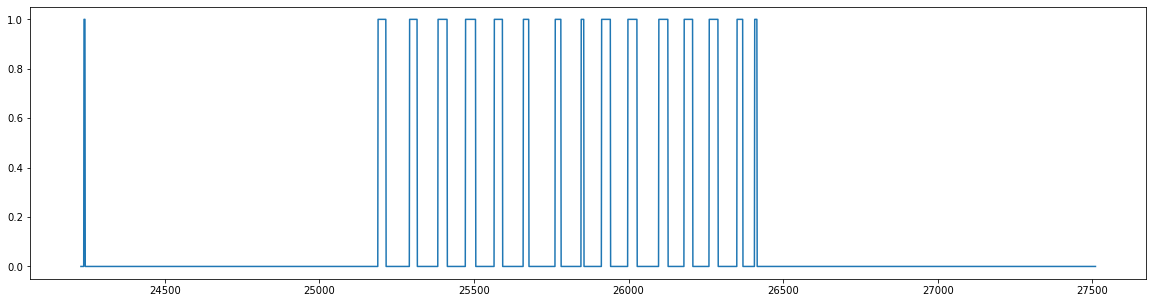

In [332]:
df[(df.id_pat=='P01')&(df.activity=='GetUpAndGo')&(df.foot_type==0)].appui_leve.plot(figsize=(20,5))

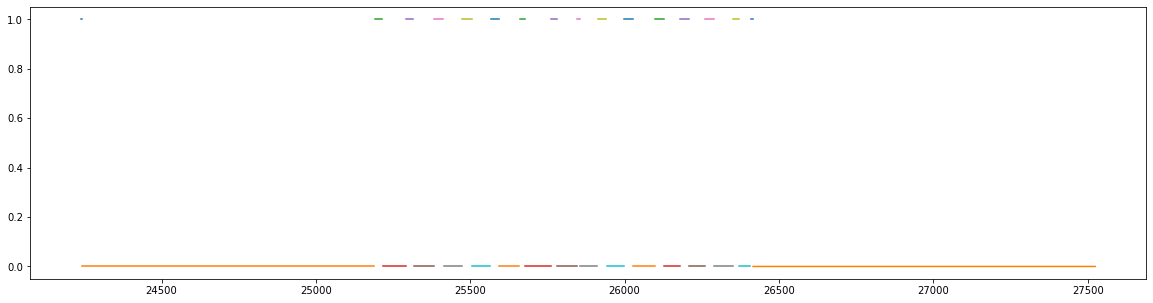

In [88]:
plt.figure(figsize=(20,5))
for i in range(343,376):
    plt.plot(train_var_frames[i].appui_leve)

In [232]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [233]:
def df_to_variate_frames(var_frames):
    frames = []
    labels = []
    for i in range(0, len(var_frames)):
        acc_x = var_frames[i]['Acc_x']
        acc_y = var_frames[i]['Acc_y']
        acc_z = var_frames[i]['Acc_z']
        
        gyro_x = var_frames[i]['Gyro_x']
        gyro_y = var_frames[i]['Gyro_y']
        gyro_z = var_frames[i]['Gyro_z']
        
        label = var_frames[i]['appui_leve'].unique()
        temp_frame = np.asarray([acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z])#.flatten()
        
        pca = PCA(n_components=1)
        pca.fit(temp_frame)
        temp_frame = pca.transform(temp_frame)

        frames.append(temp_frame)
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, 6)
    labels = np.asarray(labels)
    
    return frames, labels

**Issu: groups with only one row can only have a dimension reduction of 1 component !!!**

In [234]:
X_train, y_train = df_to_variate_frames(train_var_frames)
X_test, y_test = df_to_variate_frames(test_var_frames)

In [235]:
train_var_frames[375]

id_pat        date    activity  timeline  Acc_x  Acc_y  Acc_z    Gyro_x  \
27525    P02  2019-05-07  2minBassin  0.358056   7.52  -6.53  -2.54 -0.518145   

         Gyro_y    Gyro_z  appui_leve  foot_type  groups  
27525  1.226094  0.007636         1.0          0     376

In [236]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((33750, 6), (33750, 1), (1458, 6), (1458, 1))

In [237]:
X_train

array([[-68.0908783 , 156.89425017, -21.55776925, -22.0200045 ,
        -22.84655693, -22.37904119],
       [-13.16114584,  35.49242746,  -1.8439974 ,  -6.05913902,
         -7.63449893,  -6.79364627],
       [-50.54814122,  99.20650169,  -6.84652995, -14.04957752,
        -13.85412209, -13.90813091],
       ...,
       [ 12.99936178,  35.12577682, -17.2179272 , -11.07192626,
         -9.81539577, -10.01988937],
       [ 16.97440431,  48.63307753, -16.06475293, -16.99558179,
        -15.21316095, -17.33398617],
       [-61.12358545, 234.09132429,  43.48024932, -86.68370905,
        -81.91063916, -47.85363995]])

In [238]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [239]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

<ipython-input-239-64cffc1284fb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [240]:
clf.score(X_test, y_test)

0.911522633744856

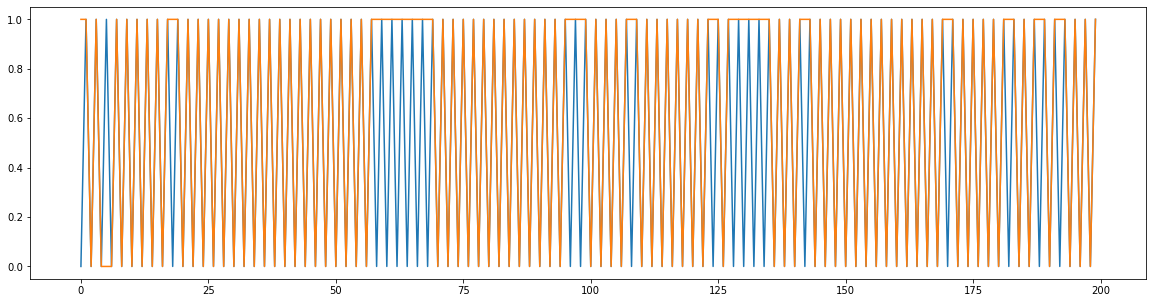

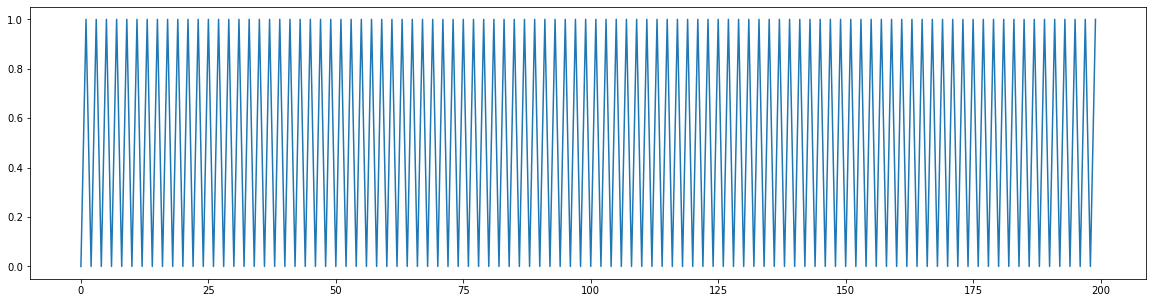

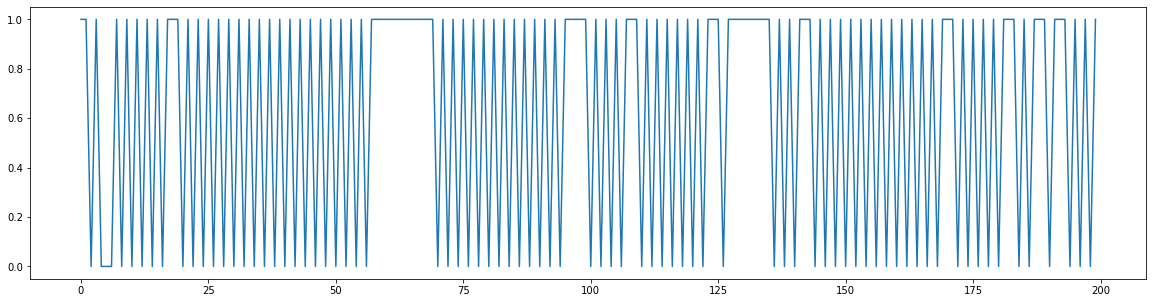

In [241]:
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(y_test[200:400])
plt.plot(y_pred[200:400])
plt.figure(figsize=(20,5))
plt.plot(y_test[200:400])
plt.figure(figsize=(20,5))
plt.plot(y_pred[200:400])

In [253]:
import itertools

In [261]:
y_real_test_pred = [[ele]*len(frame) for ele,frame in zip(y_pred,test_var_frames)]
y_real_test_pred = np.asarray(list(itertools.chain(*y_real_test_pred)))
y_real_test = test_df.appui_leve.values
y_real_test.shape, y_real_test_pred.shape

((55668,), (55668,))

In [262]:
accuracy_score(y_real_test_pred, y_real_test)

0.9484982395631243

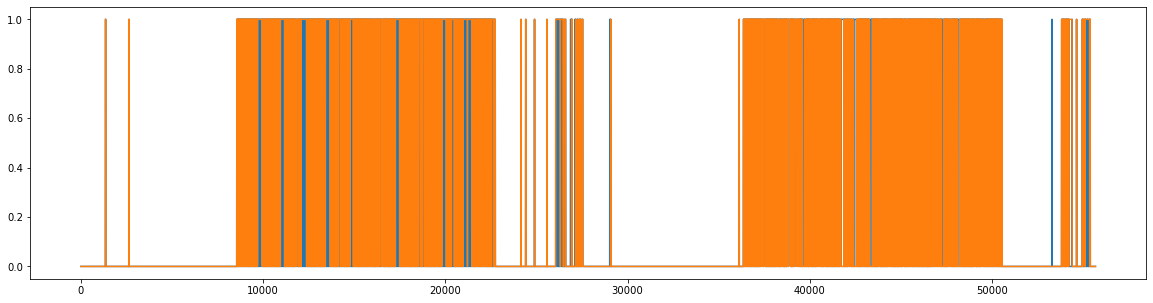

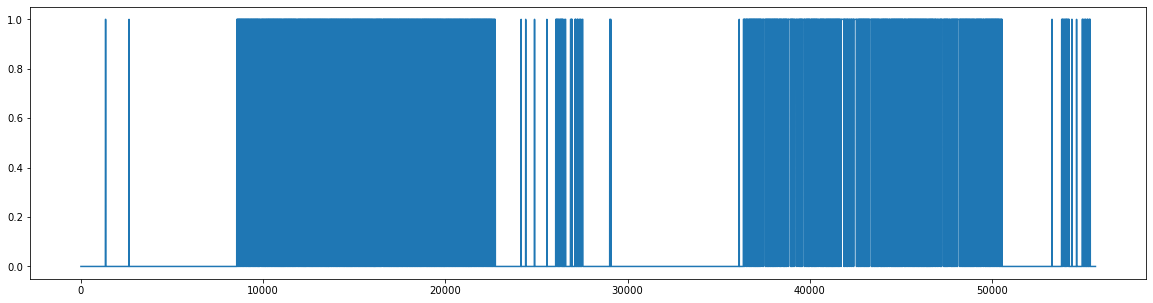

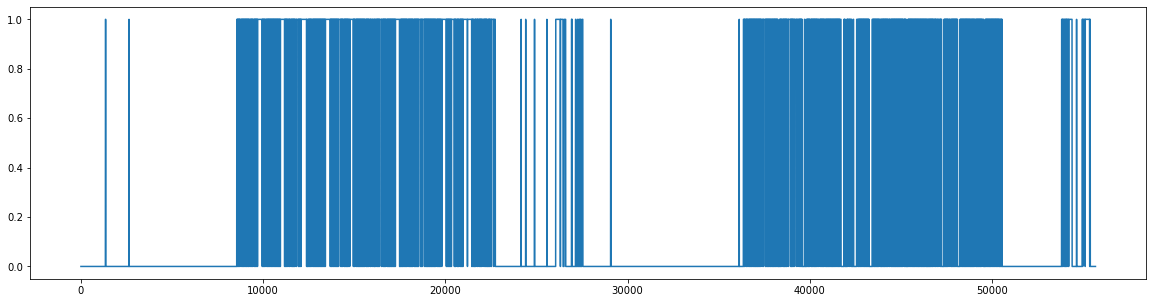

In [264]:
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.plot(y_real_test_pred)
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.figure(figsize=(20,5))
plt.plot(y_real_test_pred)

In [265]:
clf = XGBClassifier(random_state=0)
clf.fit(X_train, y_train)

C:\Users\youne\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\youne\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[08:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [266]:
clf.score(X_test, y_test)

0.9293552812071331

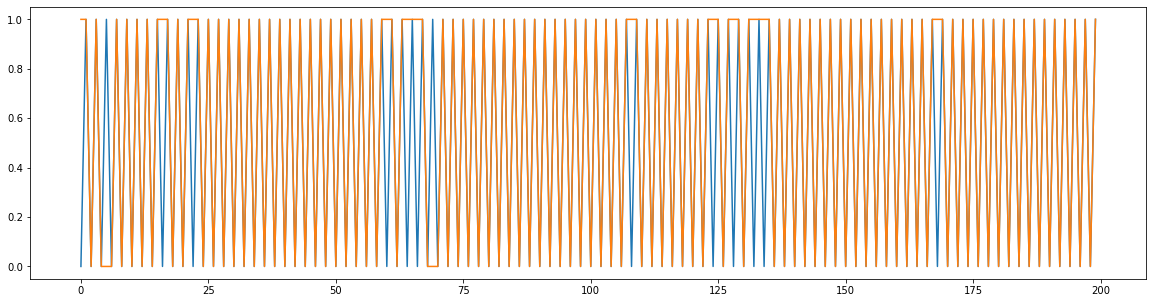

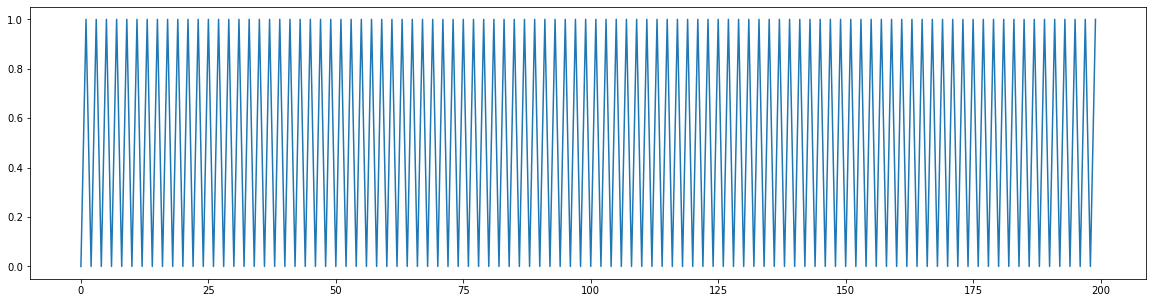

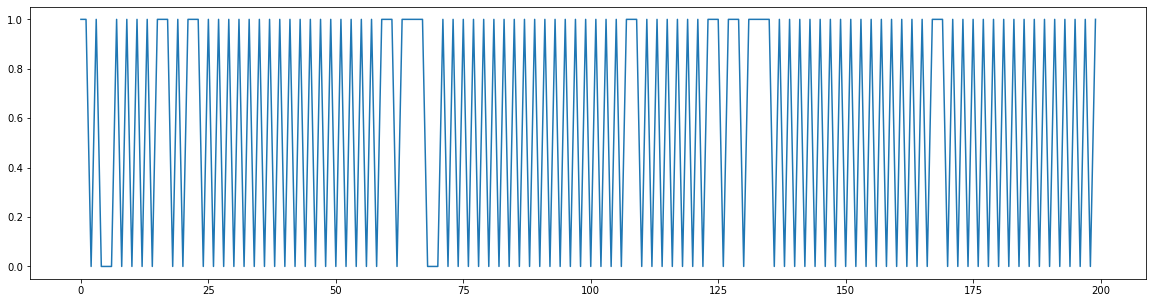

In [267]:
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(y_test[200:400])
plt.plot(y_pred[200:400])
plt.figure(figsize=(20,5))
plt.plot(y_test[200:400])
plt.figure(figsize=(20,5))
plt.plot(y_pred[200:400])

In [268]:
y_real_test_pred = [[ele]*len(frame) for ele,frame in zip(y_pred,test_var_frames)]
y_real_test_pred = np.asarray(list(itertools.chain(*y_real_test_pred)))
y_real_test = test_df.appui_leve.values
y_real_test.shape, y_real_test_pred.shape

((55668,), (55668,))

In [269]:
accuracy_score(y_real_test_pred, y_real_test)

0.9470970755191492

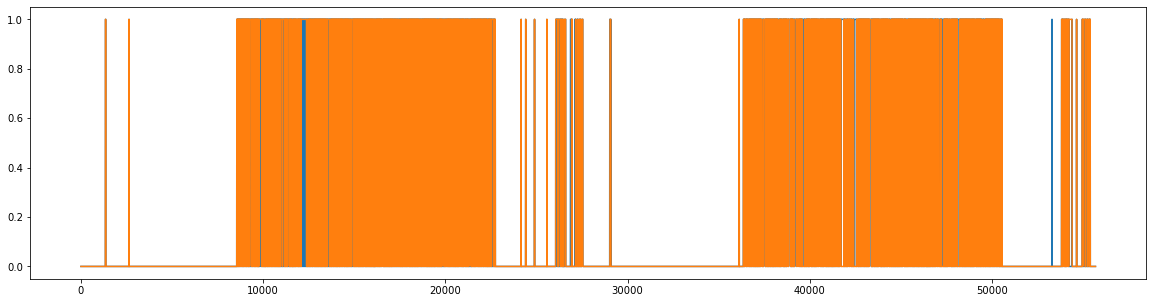

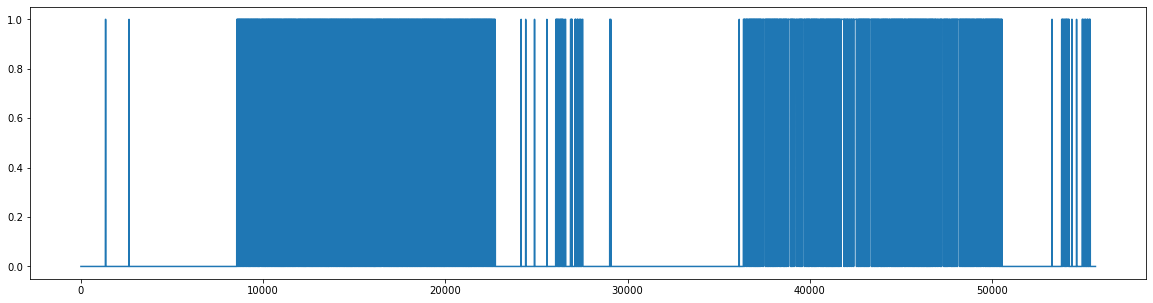

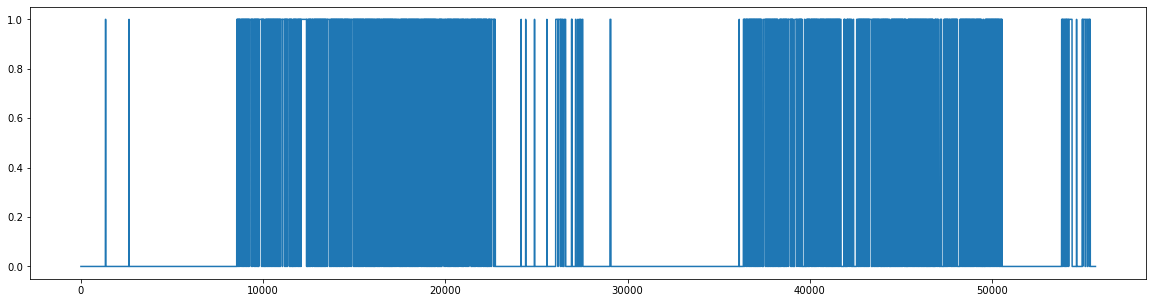

In [270]:
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.plot(y_real_test_pred)
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.figure(figsize=(20,5))
plt.plot(y_real_test_pred)

### DCT

In [146]:
from scipy.fft import fft, dct

In [273]:
def df_to_variate_dct_frames(var_frames):
    frames = []
    labels = []
    for i in range(0, len(var_frames)):
        acc_x = dct(var_frames[i]['Acc_x'].values)
        acc_y = dct(var_frames[i]['Acc_y'].values)
        acc_z = dct(var_frames[i]['Acc_z'].values)
        
        gyro_x = dct(var_frames[i]['Gyro_x'].values)
        gyro_y = dct(var_frames[i]['Gyro_y'].values)
        gyro_z = dct(var_frames[i]['Gyro_z'].values)
        
        label = var_frames[i]['appui_leve'].unique()
        temp_frame = np.asarray([acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z])#.flatten()
        
        pca = PCA(n_components=1)
        pca.fit(temp_frame)
        temp_frame = pca.transform(temp_frame)

        frames.append(temp_frame)
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, 6)
    labels = np.asarray(labels)
    
    return frames, labels

In [274]:
X_train, y_train = df_to_variate_dct_frames(train_var_frames)
X_test, y_test = df_to_variate_dct_frames(test_var_frames)

In [275]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((33750, 6), (33750, 1), (1458, 6), (1458, 1))

In [276]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

<ipython-input-276-64cffc1284fb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [277]:
clf.score(X_test, y_test)

0.8744855967078189

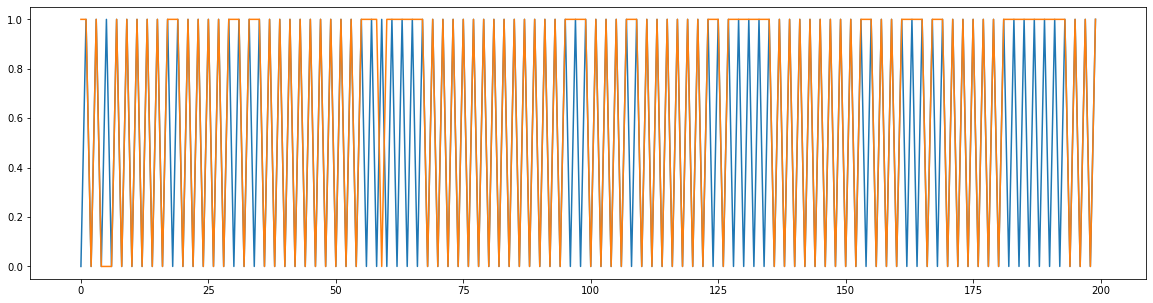

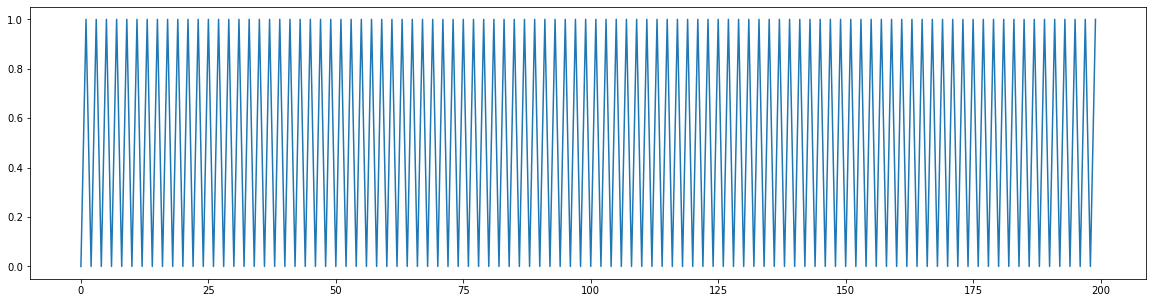

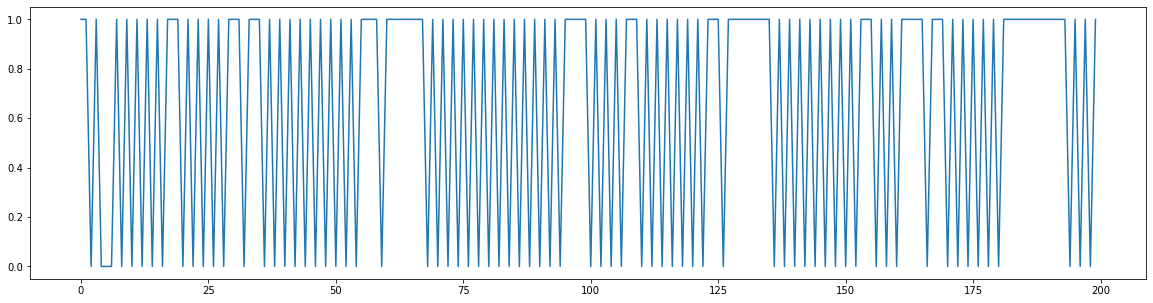

In [278]:
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(y_test[200:400])
plt.plot(y_pred[200:400])
plt.figure(figsize=(20,5))
plt.plot(y_test[200:400])
plt.figure(figsize=(20,5))
plt.plot(y_pred[200:400])

In [279]:
y_real_test_pred = [[ele]*len(frame) for ele,frame in zip(y_pred,test_var_frames)]
y_real_test_pred = np.asarray(list(itertools.chain(*y_real_test_pred)))
y_real_test = test_df.appui_leve.values
y_real_test.shape, y_real_test_pred.shape

((55668,), (55668,))

In [280]:
accuracy_score(y_real_test_pred, y_real_test)

0.9309297980886685

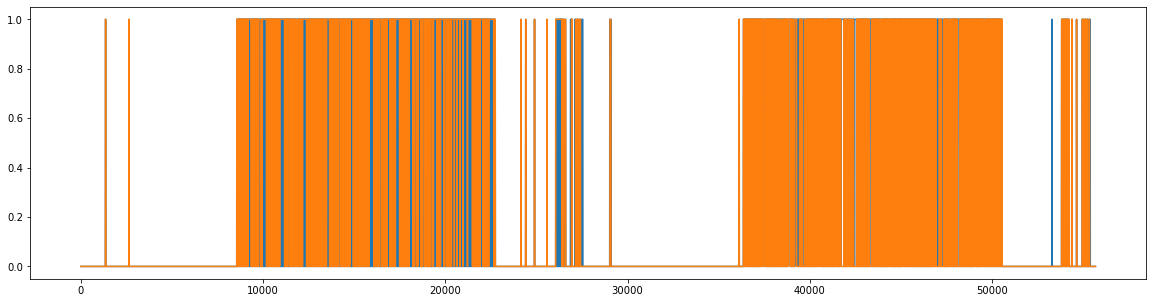

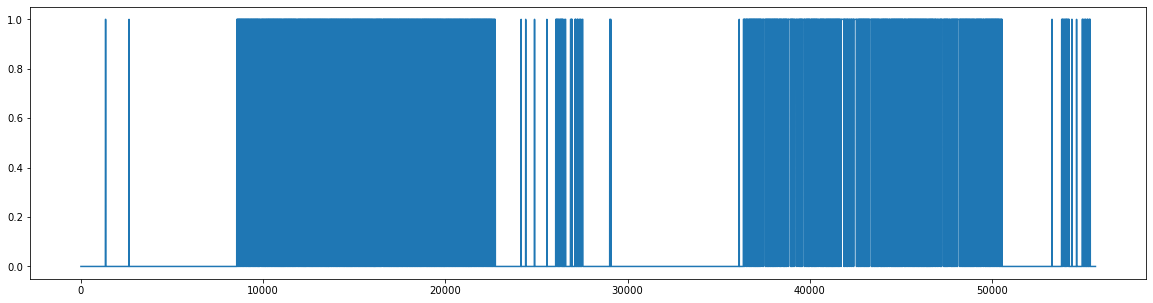

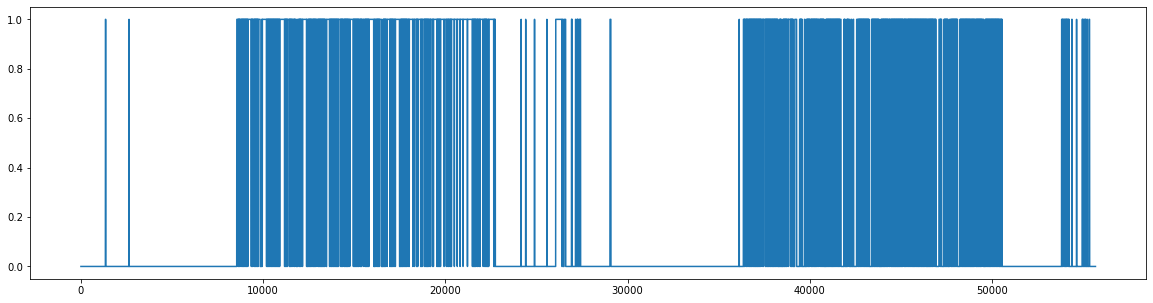

In [281]:
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.plot(y_real_test_pred)
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.figure(figsize=(20,5))
plt.plot(y_real_test_pred)

In [282]:
clf = XGBClassifier(random_state=0)
clf.fit(X_train, y_train)

C:\Users\youne\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\youne\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[09:02:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [283]:
clf.score(X_test, y_test)

0.906721536351166

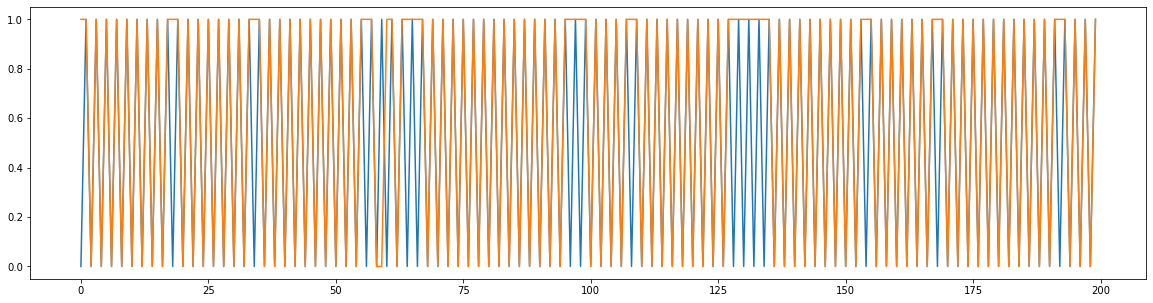

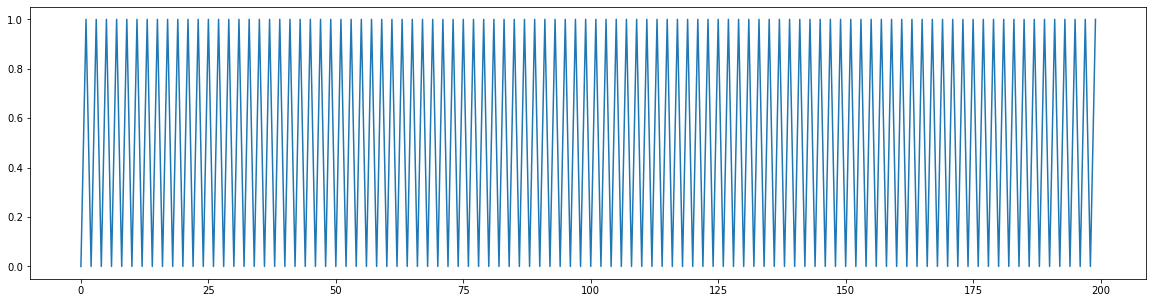

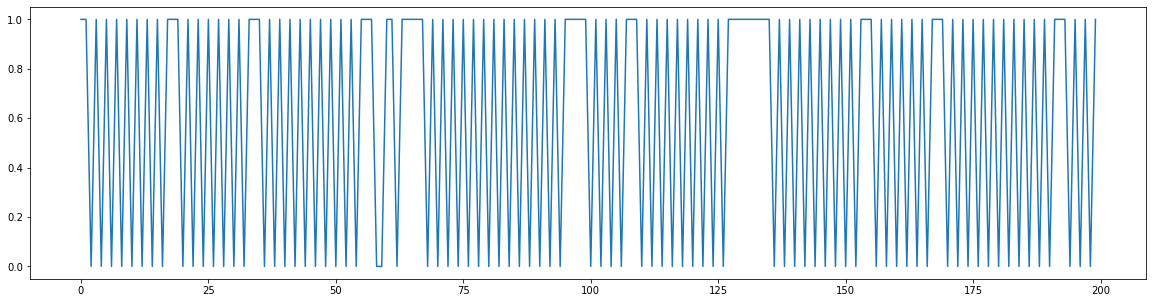

In [284]:
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(y_test[200:400])
plt.plot(y_pred[200:400])
plt.figure(figsize=(20,5))
plt.plot(y_test[200:400])
plt.figure(figsize=(20,5))
plt.plot(y_pred[200:400])

In [285]:
y_real_test_pred = [[ele]*len(frame) for ele,frame in zip(y_pred,test_var_frames)]
y_real_test_pred = np.asarray(list(itertools.chain(*y_real_test_pred)))
y_real_test = test_df.appui_leve.values
y_real_test.shape, y_real_test_pred.shape

((55668,), (55668,))

In [286]:
accuracy_score(y_real_test_pred, y_real_test)

0.9322411439246964

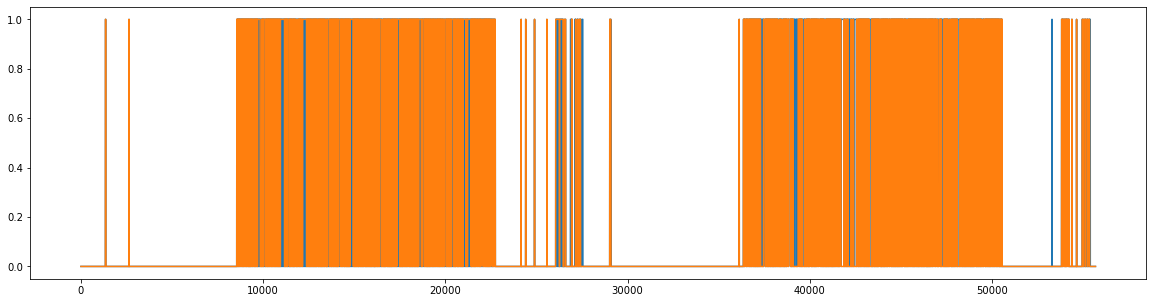

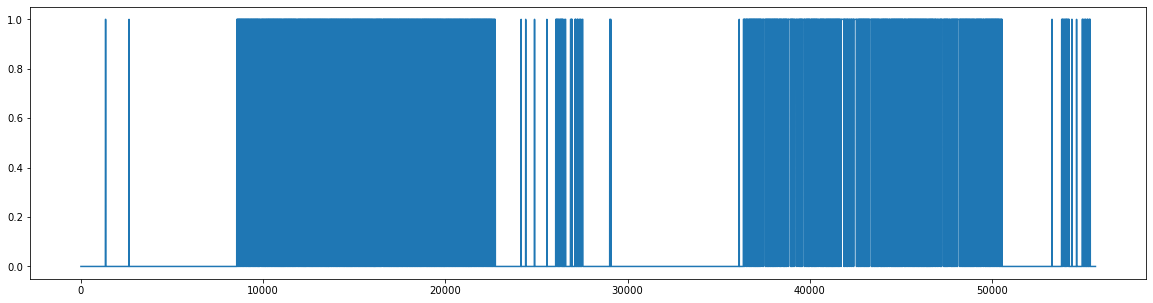

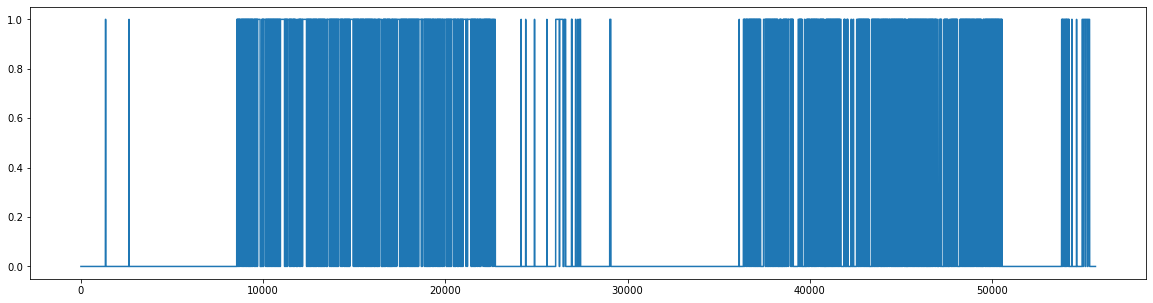

In [287]:
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.plot(y_real_test_pred)
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.figure(figsize=(20,5))
plt.plot(y_real_test_pred)

### FFT

In [288]:
def df_to_variate_fft_frames(var_frames):
    frames = []
    labels = []
    for i in range(0, len(var_frames)):
        acc_x = fft(var_frames[i]['Acc_x'].values).real
        acc_y = fft(var_frames[i]['Acc_y'].values).real
        acc_z = fft(var_frames[i]['Acc_z'].values).real
        
        gyro_x = fft(var_frames[i]['Gyro_x'].values).real
        gyro_y = fft(var_frames[i]['Gyro_y'].values).real
        gyro_z = fft(var_frames[i]['Gyro_z'].values).real
        
        label = var_frames[i]['appui_leve'].unique()
        temp_frame = np.asarray([acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z])#.flatten()
        
        pca = PCA(n_components=1)
        pca.fit(temp_frame)
        temp_frame = pca.transform(temp_frame)

        frames.append(temp_frame)
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, 6)
    labels = np.asarray(labels)
    
    return frames, labels

In [289]:
X_train, y_train = df_to_variate_fft_frames(train_var_frames)
X_test, y_test = df_to_variate_fft_frames(test_var_frames)

In [290]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((33750, 6), (33750, 1), (1458, 6), (1458, 1))

In [291]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

<ipython-input-291-64cffc1284fb>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [292]:
clf.score(X_test, y_test)

0.9176954732510288

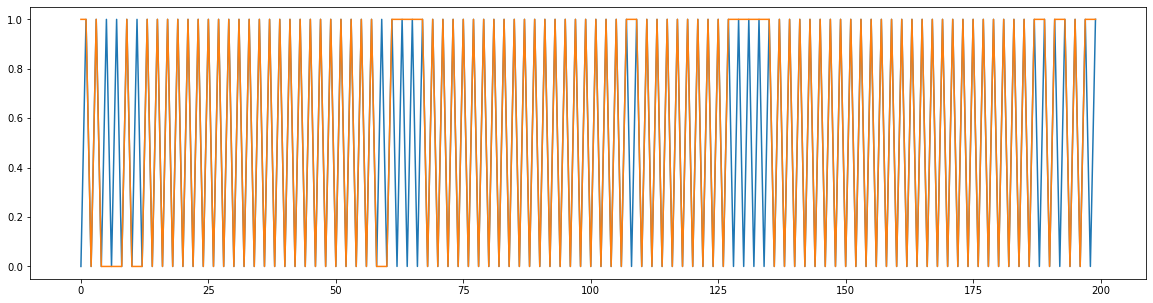

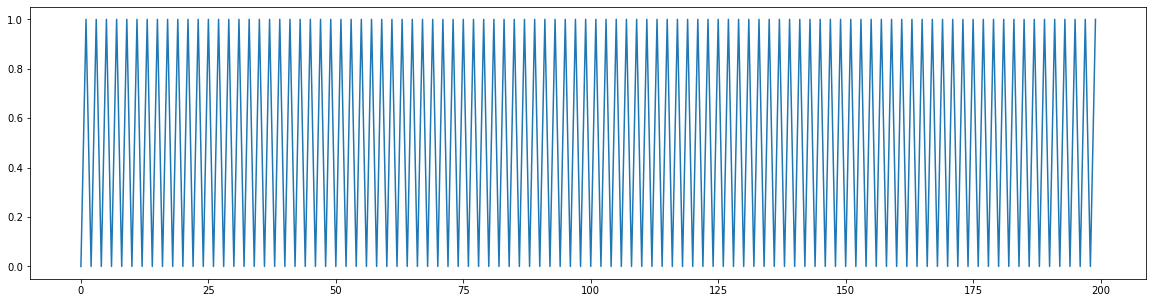

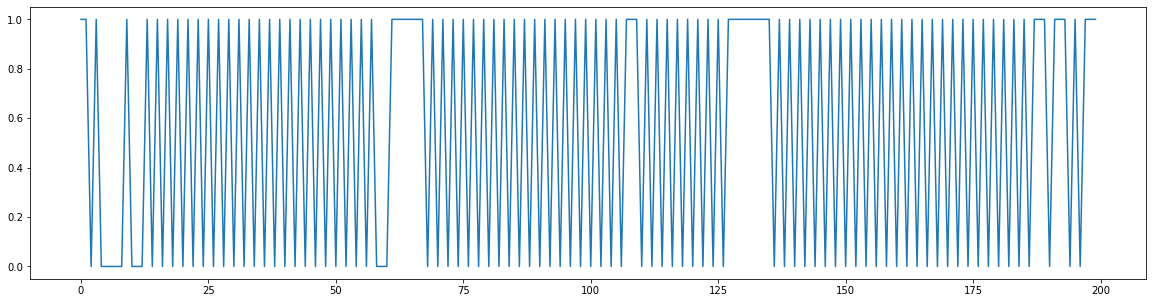

In [293]:
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(y_test[200:400])
plt.plot(y_pred[200:400])
plt.figure(figsize=(20,5))
plt.plot(y_test[200:400])
plt.figure(figsize=(20,5))
plt.plot(y_pred[200:400])

In [294]:
y_real_test_pred = [[ele]*len(frame) for ele,frame in zip(y_pred,test_var_frames)]
y_real_test_pred = np.asarray(list(itertools.chain(*y_real_test_pred)))
y_real_test = test_df.appui_leve.values
y_real_test.shape, y_real_test_pred.shape

((55668,), (55668,))

In [295]:
accuracy_score(y_real_test_pred, y_real_test)

0.9256125601781994

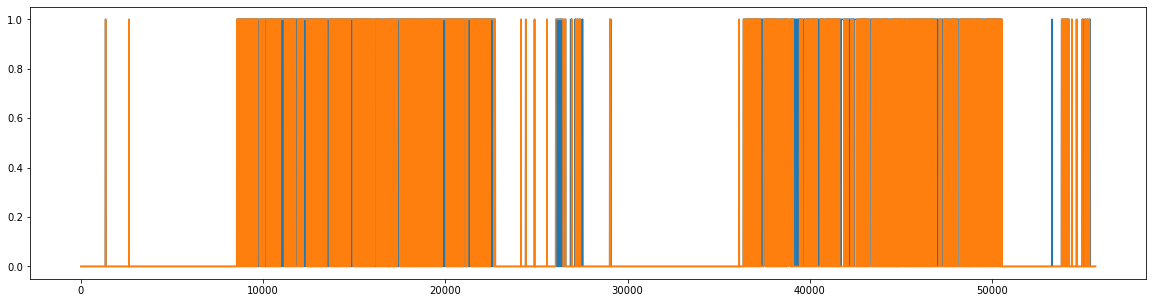

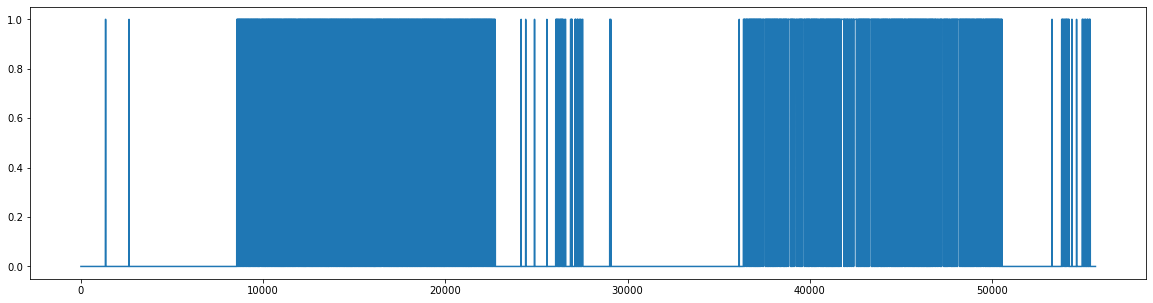

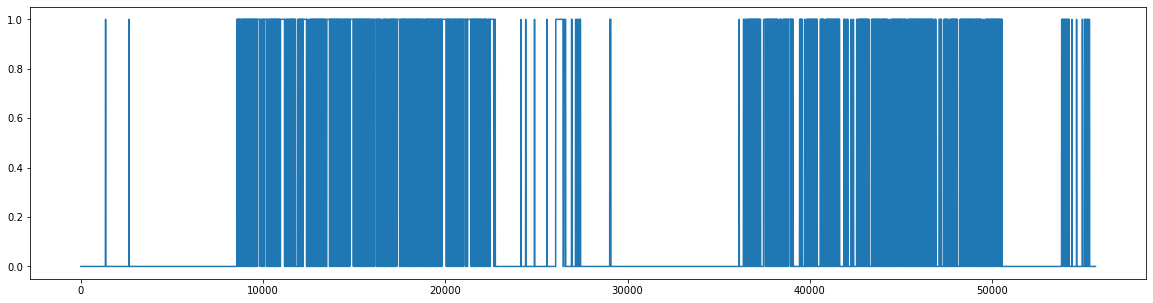

In [296]:
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.plot(y_real_test_pred)
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.figure(figsize=(20,5))
plt.plot(y_real_test_pred)

In [297]:
clf = XGBClassifier(random_state=0)
clf.fit(X_train, y_train)

C:\Users\youne\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\youne\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[09:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [298]:
clf.score(X_test, y_test)

0.9348422496570644

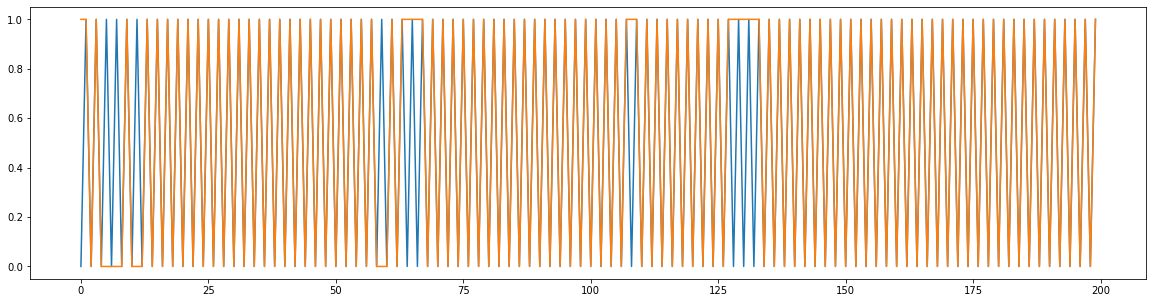

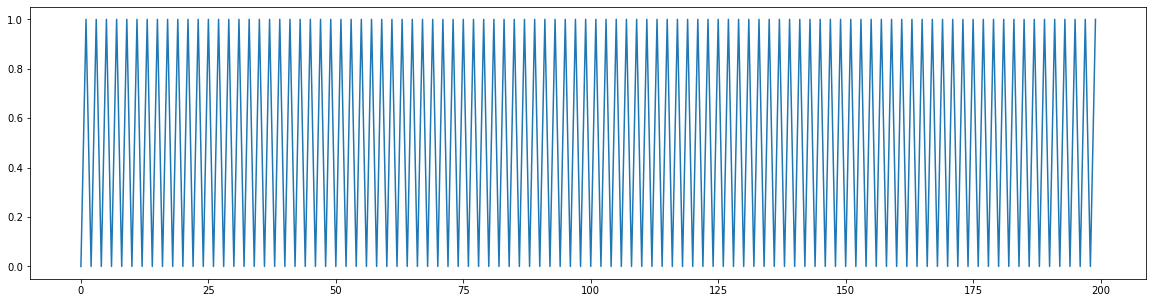

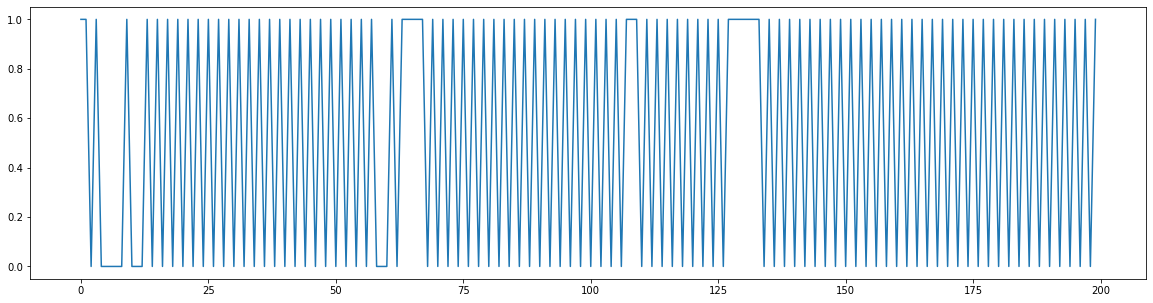

In [299]:
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(y_test[200:400])
plt.plot(y_pred[200:400])
plt.figure(figsize=(20,5))
plt.plot(y_test[200:400])
plt.figure(figsize=(20,5))
plt.plot(y_pred[200:400])

In [300]:
y_real_test_pred = [[ele]*len(frame) for ele,frame in zip(y_pred,test_var_frames)]
y_real_test_pred = np.asarray(list(itertools.chain(*y_real_test_pred)))
y_real_test = test_df.appui_leve.values
y_real_test.shape, y_real_test_pred.shape

((55668,), (55668,))

In [301]:
accuracy_score(y_real_test_pred, y_real_test)

0.9300855069339656

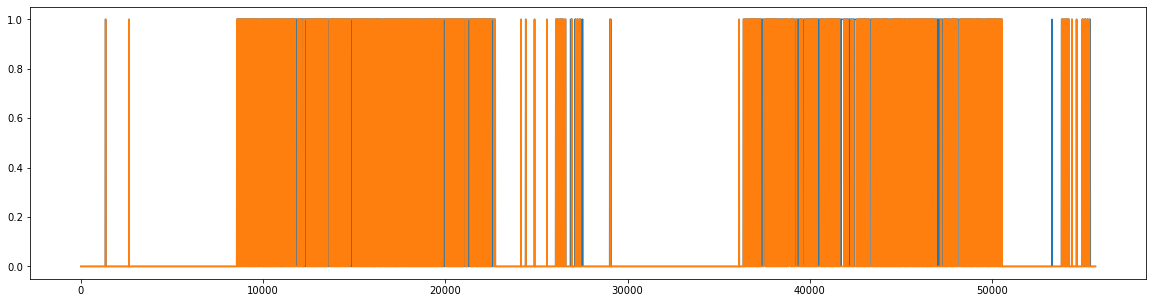

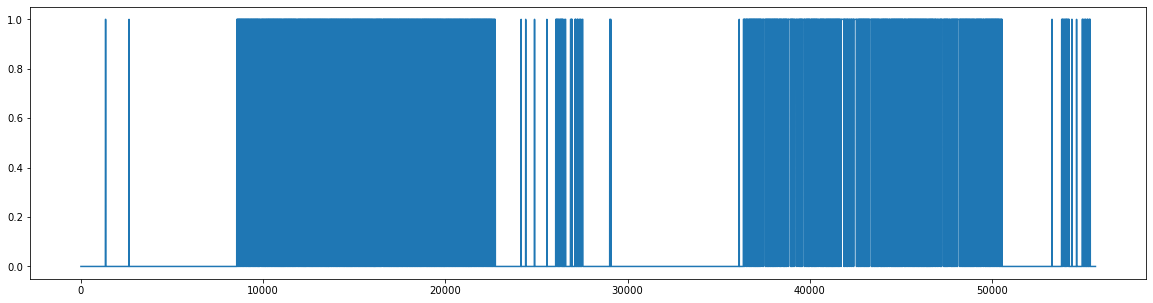

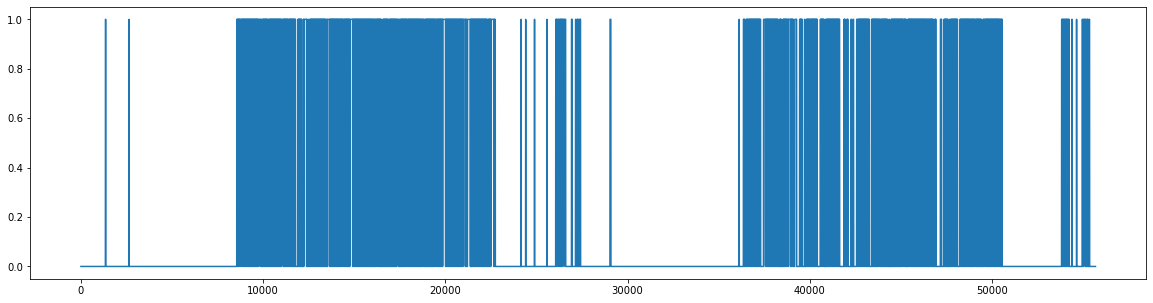

In [302]:
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.plot(y_real_test_pred)
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.figure(figsize=(20,5))
plt.plot(y_real_test_pred)

## Fixed size windows

In [337]:
train_var_frames = np.array_split(df, df.shape[0]//110)

In [338]:
train_var_frames

[    id_pat        date    activity  timeline  Acc_x  Acc_y  Acc_z    Gyro_x  \
 0      P01  2019-05-07  2minBassin  0.000000   2.50  -9.38   0.25 -0.025089   
 1      P01  2019-05-07  2minBassin  0.025575   2.43  -9.51   0.34 -0.013090   
 2      P01  2019-05-07  2minBassin  0.051151   2.15  -9.62   0.51 -0.001091   
 3      P01  2019-05-07  2minBassin  0.076726   2.20  -9.63   0.62 -0.014181   
 4      P01  2019-05-07  2minBassin  0.102302   2.20  -9.51   0.93 -0.085085   
 ..     ...         ...         ...       ...    ...    ...    ...       ...   
 106    P01  2019-05-07  2minBassin  2.710997   2.36  -9.59   0.13 -0.004363   
 107    P01  2019-05-07  2minBassin  2.736573   2.38  -9.54   0.13  0.002182   
 108    P01  2019-05-07  2minBassin  2.762148   2.40  -9.60   0.10 -0.001091   
 109    P01  2019-05-07  2minBassin  2.787724   2.35  -9.61   0.14 -0.004363   
 110    P01  2019-05-07  2minBassin  2.813299   2.39  -9.59   0.14 -0.002182   
 
        Gyro_y    Gyro_z  appui_leve  

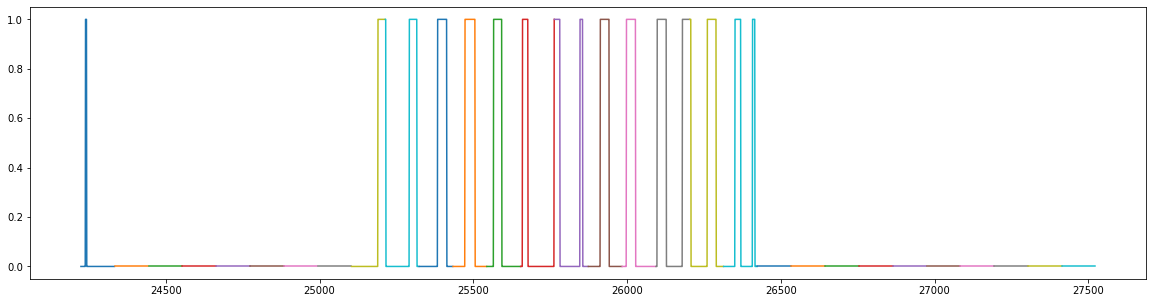

In [341]:
plt.figure(figsize=(20,5))
for sub_frame in train_var_frames[24229//110:27510//110]:
    plt.plot(sub_frame.appui_leve)


In [17]:
2.6/0.025

104.0

In [303]:
frame_size = 110
skip_size = frame_size * 1 #No overlapping

In [304]:
import scipy.stats as stats

In [333]:
def df_to_fixed_frames(df, frame_size, skip_size):
    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, skip_size):
        acc_x = df['Acc_x'].values[i:i+frame_size]
        acc_y = df['Acc_y'].values[i:i+frame_size]
        acc_z = df['Acc_z'].values[i:i+frame_size]
        
        gyro_x = df['Gyro_x'].values[i:i+frame_size]
        gyro_y = df['Gyro_y'].values[i:i+frame_size]
        gyro_z = df['Gyro_z'].values[i:i+frame_size]
        
        label = stats.mode(df['appui_leve'][i:i+frame_size])[0][0]
        
        temp_frame = np.asarray([acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z])
        pca = PCA(n_components=6)
        pca.fit(temp_frame)
        temp_frame = pca.transform(temp_frame)
        frames.append(temp_frame)
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, 6*6)
    labels = np.asarray(labels)
    
    return frames, labels

In [306]:
X_train, y_train = df_to_fixed_frames(train_df, frame_size, skip_size)
X_test, y_test = df_to_fixed_frames(test_df, frame_size, skip_size)

In [307]:
X_train.shape, y_train.shape

((19668, 36), (19668,))

In [308]:
y_train

array([0., 0., 0., ..., 0., 1., 0.])

In [309]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [310]:
clf.score(X_test, y_test)

0.9901185770750988

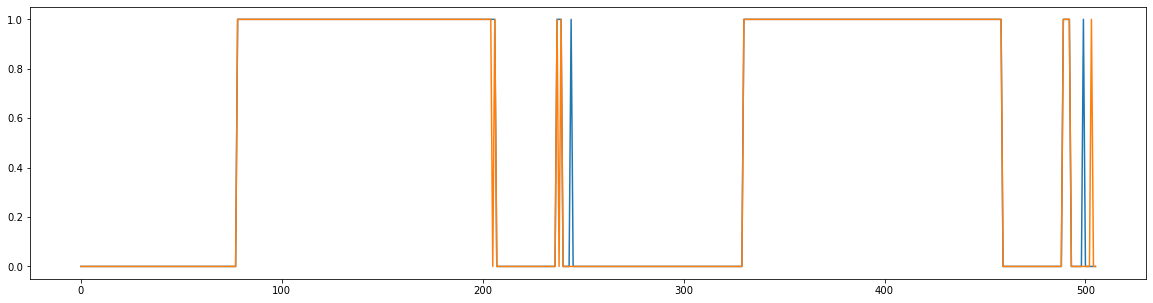

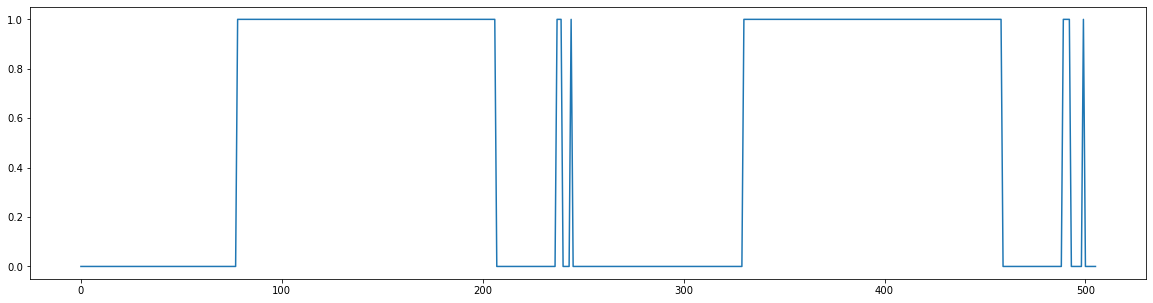

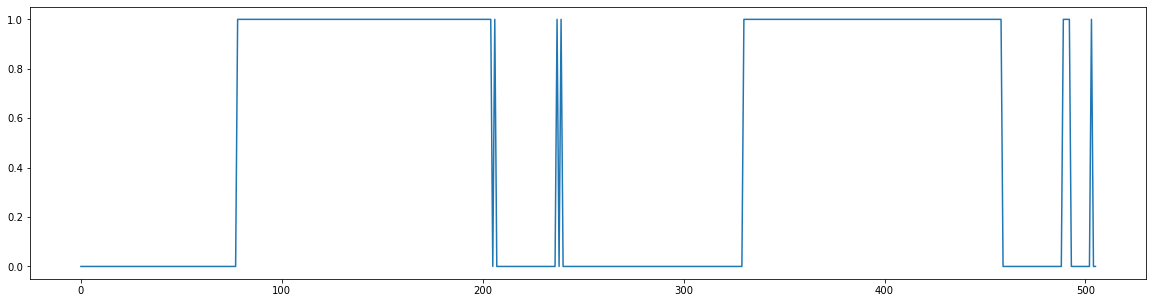

In [311]:
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.plot(y_pred)
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.figure(figsize=(20,5))
plt.plot(y_pred)

In [312]:
y_real_test_pred = [[ele]*110 for ele in y_pred]
y_real_test_pred = np.asarray(y_real_test_pred).flatten()
y_real_test = test_df.appui_leve.values[:-8]
y_real_test.shape, y_real_test_pred.shape

((55660,), (55660,))

In [313]:
accuracy_score(y_real_test, y_real_test_pred)

0.8781171397772188

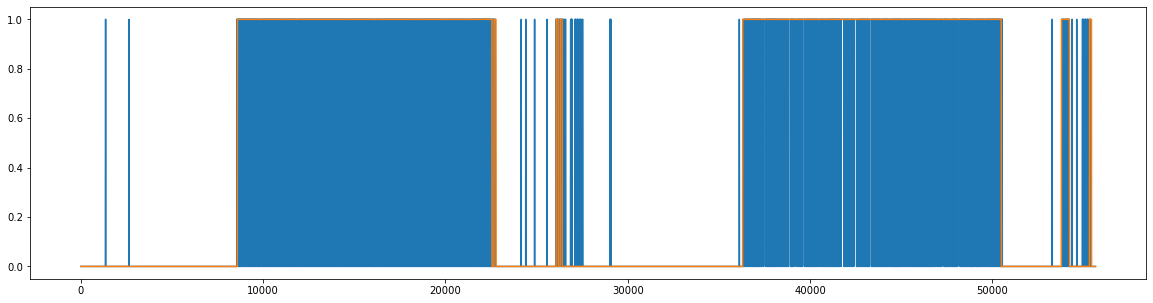

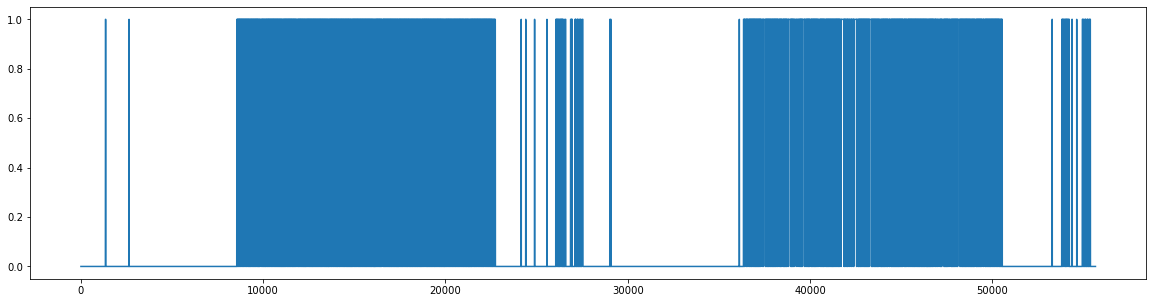

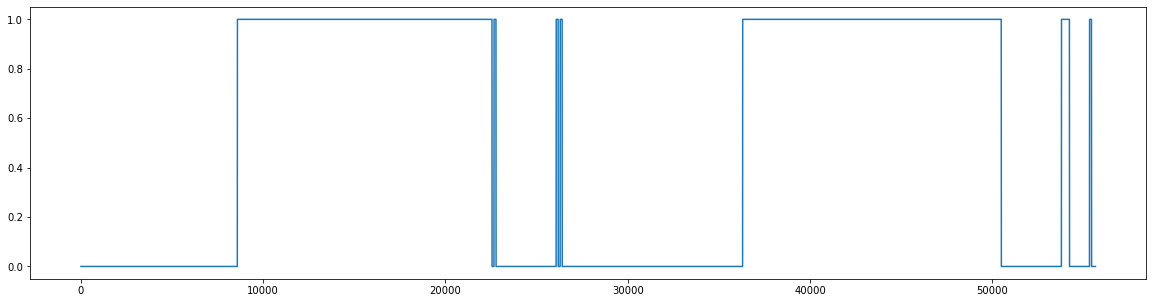

In [314]:
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.plot(y_real_test_pred)
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.figure(figsize=(20,5))
plt.plot(y_real_test_pred)

In [315]:
clf = XGBClassifier(random_state=0)
clf.fit(X_train, y_train)

C:\Users\youne\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:08:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [316]:
clf.score(X_test, y_test)

0.9920948616600791

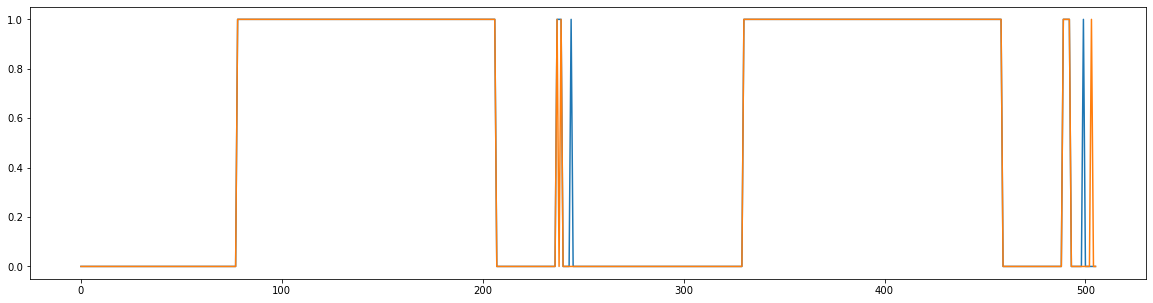

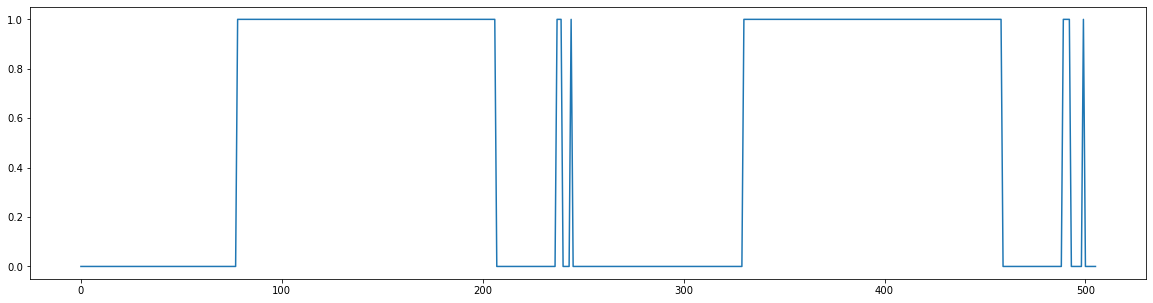

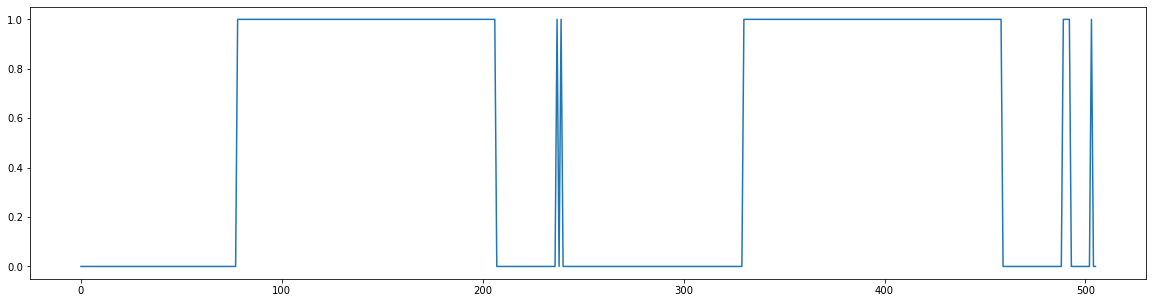

In [317]:
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.plot(y_pred)
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.figure(figsize=(20,5))
plt.plot(y_pred)

In [318]:
y_real_test_pred = [[ele]*110 for ele in y_pred]
y_real_test_pred = np.asarray(y_real_test_pred).flatten()
y_real_test = test_df.appui_leve.values[:-8]
y_real_test.shape, y_real_test_pred.shape

((55660,), (55660,))

In [319]:
accuracy_score(y_real_test, y_real_test_pred)

0.878296802012217

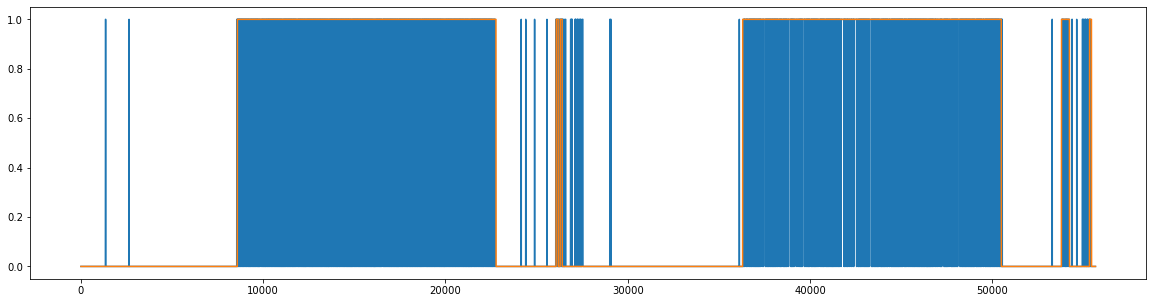

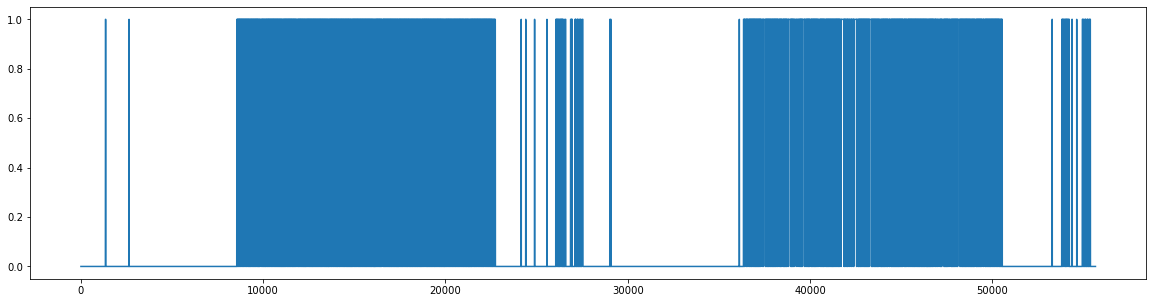

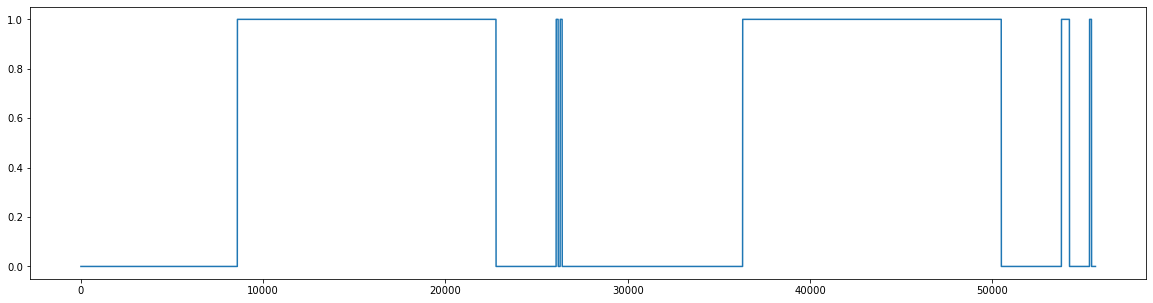

In [320]:
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.plot(y_real_test_pred)
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.figure(figsize=(20,5))
plt.plot(y_real_test_pred)

### DCT

In [203]:
def df_to_fixed_dct_frames(df, frame_size, skip_size):
    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, skip_size):
        acc_x = dct(df['Acc_x'].values[i:i+frame_size])
        acc_y = dct(df['Acc_y'].values[i:i+frame_size])
        acc_z = dct(df['Acc_z'].values[i:i+frame_size])
        
        gyro_x = dct(df['Gyro_x'].values[i:i+frame_size])
        gyro_y = dct(df['Gyro_y'].values[i:i+frame_size])
        gyro_z = dct(df['Gyro_z'].values[i:i+frame_size])
        
        label = stats.mode(df['appui_leve'][i:i+frame_size])[0][0]
        
        temp_frame = np.asarray([acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z])
        pca = PCA(n_components=6)
        pca.fit(temp_frame)
        temp_frame = pca.transform(temp_frame)
        frames.append(temp_frame)
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, 6*6)
    labels = np.asarray(labels)
    
    return frames, labels

In [204]:
X_train, y_train = df_to_fixed_dct_frames(train_df, frame_size, skip_size)
X_test, y_test = df_to_fixed_dct_frames(test_df, frame_size, skip_size)

In [205]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [206]:
clf.score(X_test, y_test)

0.9920948616600791

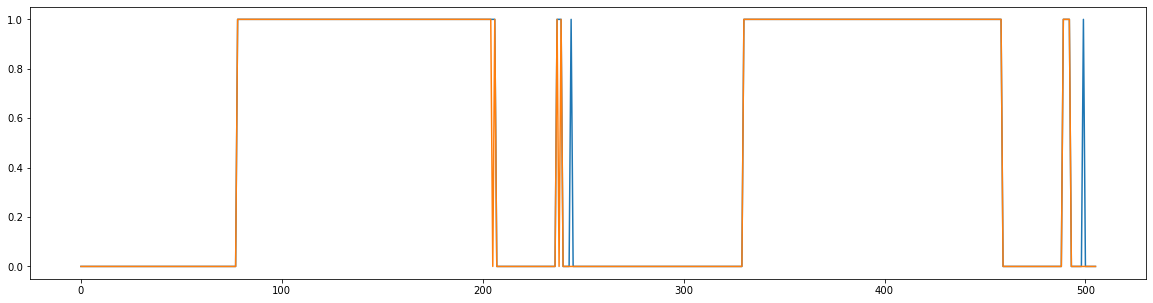

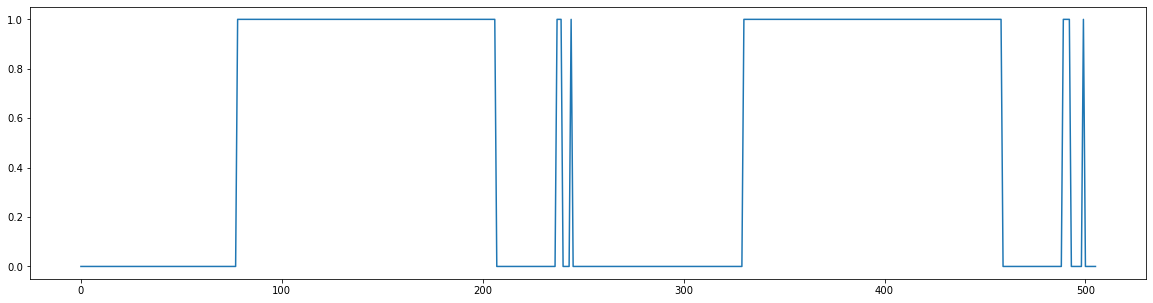

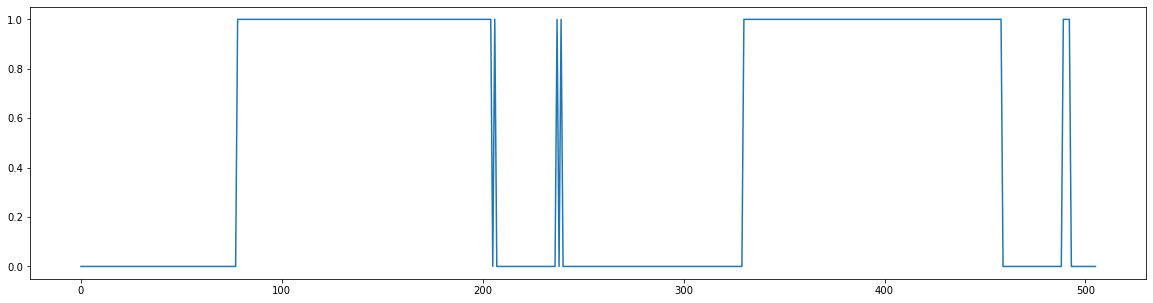

In [207]:
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.plot(y_pred)
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.figure(figsize=(20,5))
plt.plot(y_pred)

### FFT

In [209]:
def df_to_fixed_fft_frames(df, frame_size, skip_size):
    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, skip_size):
        acc_x = fft(df['Acc_x'].values[i:i+frame_size]).real
        acc_y = fft(df['Acc_y'].values[i:i+frame_size]).real
        acc_z = fft(df['Acc_z'].values[i:i+frame_size]).real
        
        gyro_x = fft(df['Gyro_x'].values[i:i+frame_size]).real
        gyro_y = fft(df['Gyro_y'].values[i:i+frame_size]).real
        gyro_z = fft(df['Gyro_z'].values[i:i+frame_size]).real
        
        label = stats.mode(df['appui_leve'][i:i+frame_size])[0][0]
        
        temp_frame = np.asarray([acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z])
        pca = PCA(n_components=6)
        pca.fit(temp_frame)
        temp_frame = pca.transform(temp_frame)
        frames.append(temp_frame)
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, 6*6)
    labels = np.asarray(labels)
    
    return frames, labels

In [210]:
X_train, y_train = df_to_fixed_fft_frames(train_df, frame_size, skip_size)
X_test, y_test = df_to_fixed_fft_frames(test_df, frame_size, skip_size)

In [211]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [212]:
clf.score(X_test, y_test)

0.9901185770750988

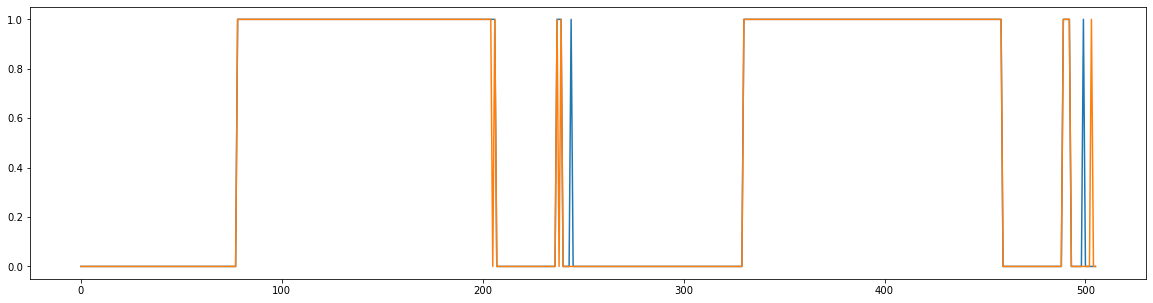

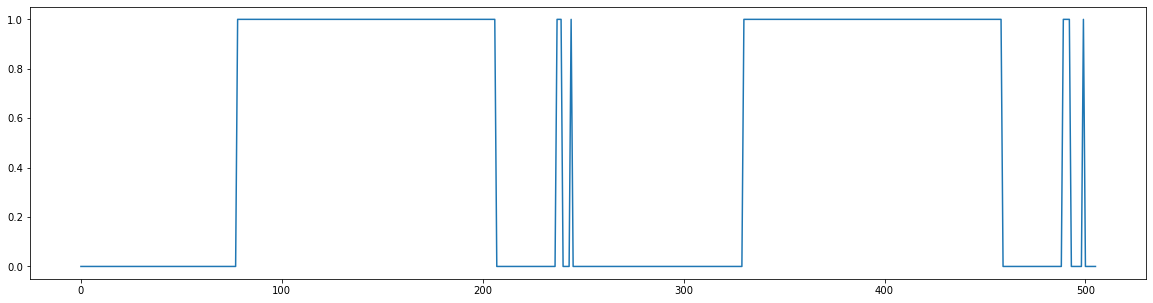

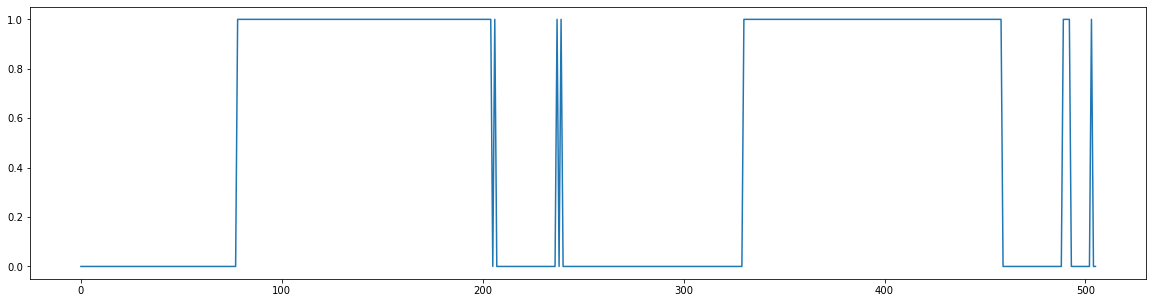

In [213]:
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.plot(y_pred)
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.figure(figsize=(20,5))
plt.plot(y_pred)

In [219]:
y_real_test_pred = [[ele]*110 for ele in y_pred]
y_real_test_pred = np.asarray(y_real_test_pred).flatten()
y_real_test = test_df.appui_leve.values[:-8]
y_real_test.shape, y_real_test_pred.shape

In [227]:
accuracy_score(y_real_test, y_real_test_pred)

0.8781171397772188

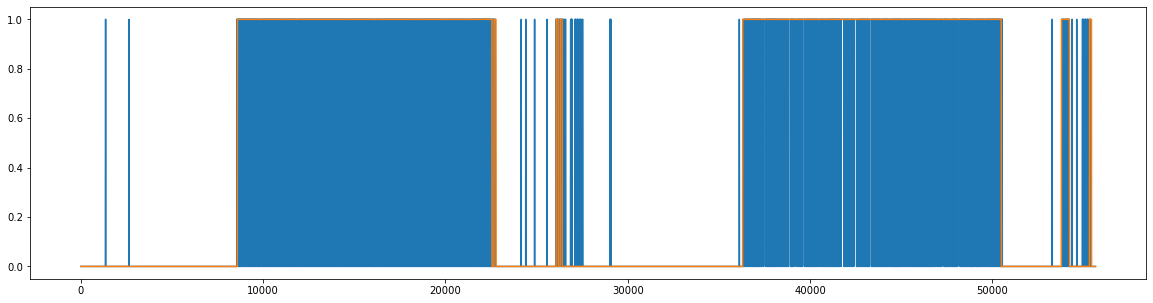

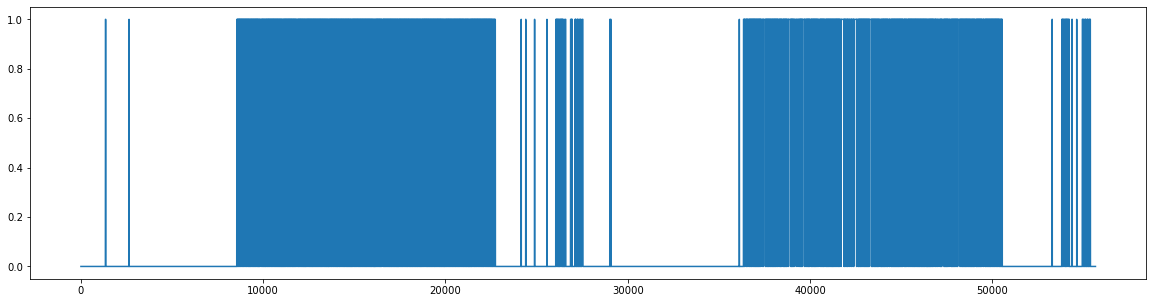

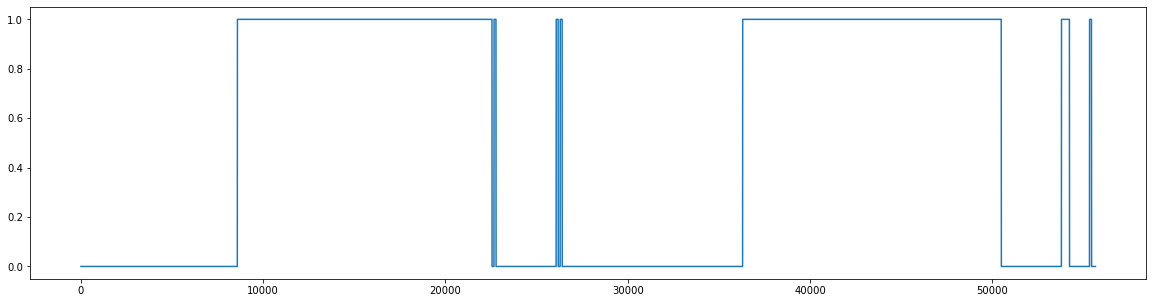

In [231]:
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.plot(y_real_test_pred)
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.figure(figsize=(20,5))
plt.plot(y_real_test_pred)

## Lower frame size

In [321]:
frame_size = 50
skip_size = frame_size * 1

In [322]:
X_train, y_train = df_to_fixed_frames(train_df, frame_size, skip_size)
X_test, y_test = df_to_fixed_frames(test_df, frame_size, skip_size)

In [323]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [324]:
clf.score(X_test, y_test)

0.9829290206648698

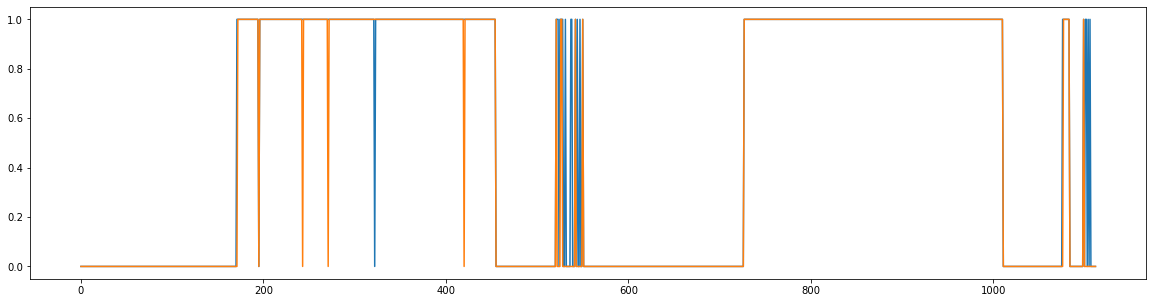

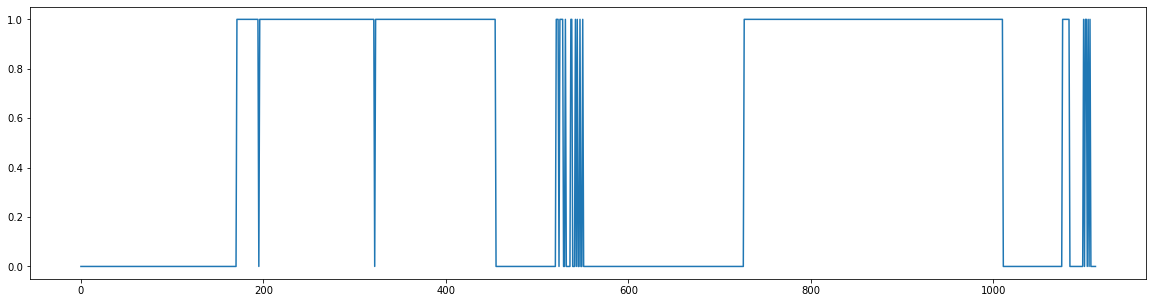

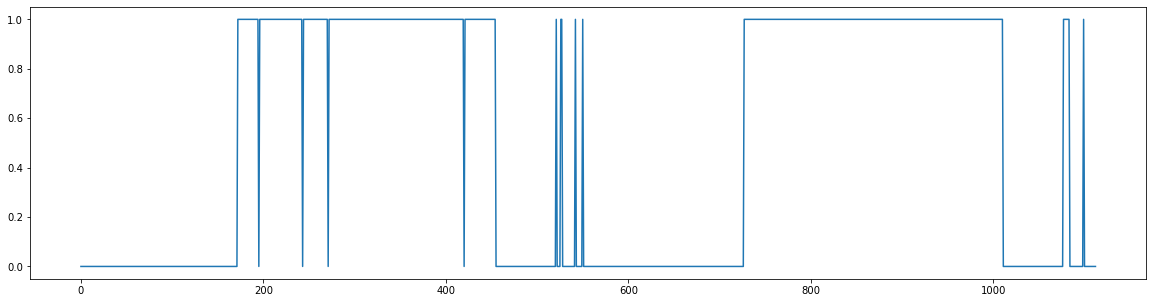

In [325]:
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.plot(y_pred)
plt.figure(figsize=(20,5))
plt.plot(y_test)
plt.figure(figsize=(20,5))
plt.plot(y_pred)

In [329]:
y_real_test_pred = [[ele]*50 for ele in y_pred]
y_real_test_pred = np.asarray(y_real_test_pred).flatten()
y_real_test = test_df.appui_leve.values[:-18]
y_real_test.shape, y_real_test_pred.shape

((55650,), (55650,))

In [330]:
accuracy_score(y_real_test, y_real_test_pred)

0.8805390835579515

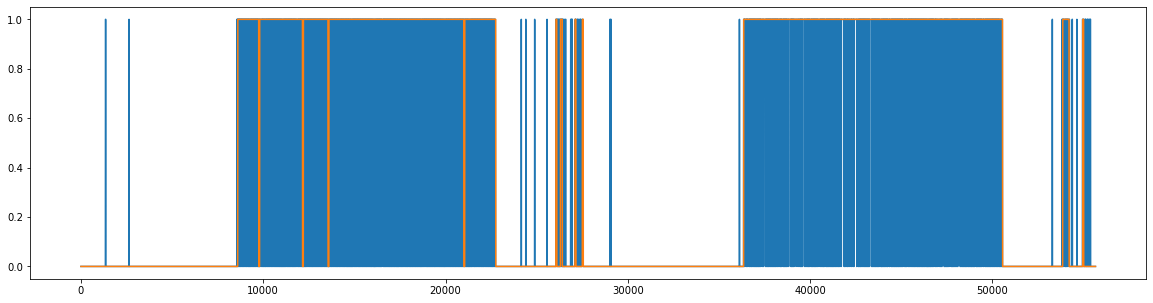

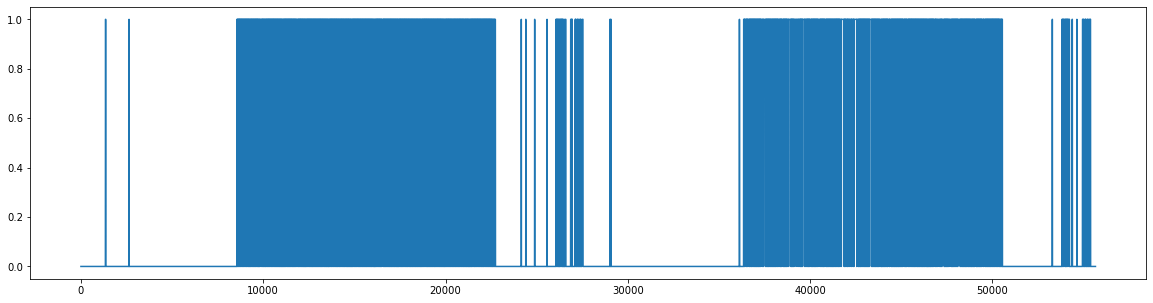

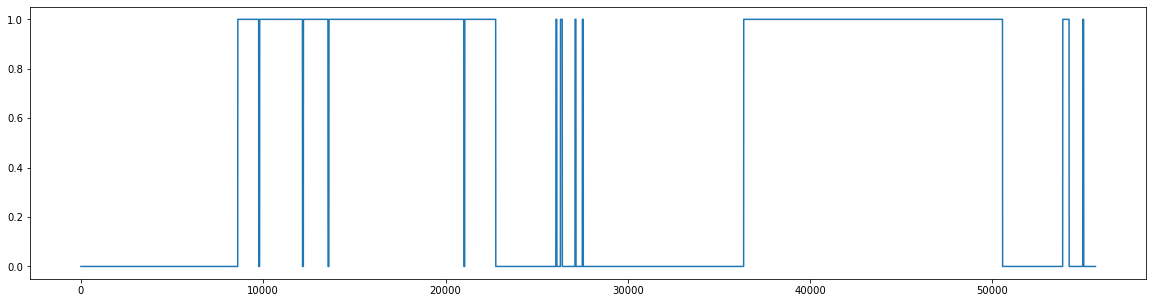

In [331]:
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.plot(y_real_test_pred)
plt.figure(figsize=(20,5))
plt.plot(y_real_test)
plt.figure(figsize=(20,5))
plt.plot(y_real_test_pred)